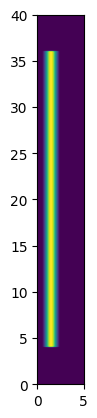

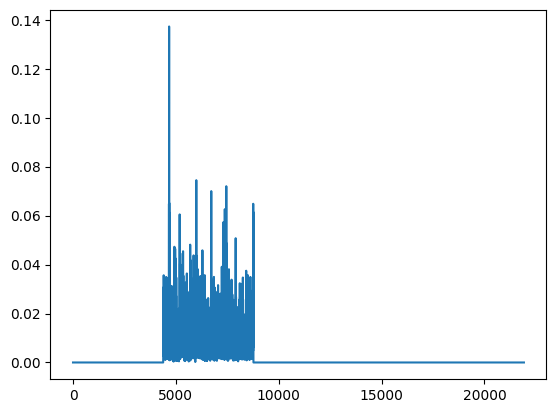

In [4]:
import numpy as np
from py3gpp import *
import matplotlib.pyplot as plt


scs = 30e3
numRB = 273
numSub = numRB * 12
fft_size = int(2**np.ceil(np.log2(numSub)))
Fs = int(scs * fft_size)
Qm = 2
N = Qm * numSub
NP = int(N * 0.25)


pilotsBits = nrPRBS(0, N)
symbols = nrSymbolModulate(pilotsBits, 'qpsk')
#dataBits = np.random.randint(0, 2, N)
#symbols = nrSymbolModulate(dataBits, 'qpsk')
#pilotIndex = np.arange(0, fft_size, int(fft_size/len(pilotsSymbols)))
#symbols[pilotIndex] = pilotsSymbols


grid = 1j*np.zeros([fft_size, 5])
grid[int(fft_size/2 - numSub/2):int(fft_size/2 + numSub/2), 1] = symbols
plt.imshow(abs(grid), extent=[0, 5, 0, 40])
txSignal, info = nrOFDMModulate(grid=grid, initialNSlot=1, Nfft=fft_size, SampleRate=Fs, scs=30)
plt.figure()
plt.plot(abs(txSignal))



In [73]:
import pandas as pd


csv = pd.read_csv("C:\\Users\\iranj\\Documents\\TDL-A.csv")
amplitudes = csv['amplitudes']
delays = csv['delays']

In [74]:
desiredDelay = 300
#delays = np.array([0, 0.5133, 0.5440, 0.5630, 0.5440, 0.7112, 1.9092, 1.9293, 1.9589, 2.6426, 3.7136, 5.4524, 12.0034, 20.6519]) * desiredDelay
#amplitudes = np.array([-0.03, -15.8, -18.1, -19.8, -22.9, -22.4, -18.6, -20.8, -22.6, -22.3, -25.6, -20.2, -29.8, -29.2])


#delays = np.array([0, 12, 40, 100])
#amplitudes = np.array([-4, -0, -2, -6])
delays = delays * desiredDelay

delays  = np.int16(delays / (1e9/Fs))
print(delays)

plt.figure()
plt.stem(delays, amplitudes, bottom=-50)


[  0  14  14  21  16  19  24  21  28  56  69  81  80  91  92 112 150 164
 168 176 184 195 356]


<StemContainer object of 3 artists>

In [75]:
h = np.zeros(max(delays)+1)
#delays = np.array([0, 10, 150, 180, 230, 320, ])
h[delays] = 10**(np.array(amplitudes)/10)
H = np.fft.fft(h, fft_size)

In [76]:
%matplotlib qt
rxSignal = np.convolve(txSignal, h)

dataRx = nrOFDMDemodulate(waveform=rxSignal/max(abs(rxSignal)), initialNSlot=1, SampleRate=Fs, scs=30, Nfft=fft_size, nrb=numRB)


stepPilot = 2

pilotIndex = np.arange(0, len(dataRx), stepPilot)
H = dataRx[pilotIndex, 1] * symbols[pilotIndex].conj().T

#H = np.interp(np.arange(0, len(dataRx)), pilotIndex, H)

h = np.fft.ifftshift(np.fft.ifft(H, fft_size))

hh = 10*np.log10(abs(h))
#hhh = -np.var(hh)*np.ones(fft_size)
#hhh[np.arange(1, 2*fft_size, 2)] = hh 


#idx = np.argmax(hh)
plt.figure()
plt.plot(hh[int(len(hh)/2)-1:], '-')



In [77]:
plt.figure()
plt.plot(abs(h[int(len(h)/2)-1:]))

In [107]:
import numpy as np

class MultiArmedBandit:
    def __init__(self, A):
        self.A = A
        self.epsilon = 0.1
        self.N = np.zeros(A)
        self.Q = np.zeros(A)
        self.totalReward = 0
        
        

    def select_action(self):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.Q)
        else:
            return np.random.randint(0, self.A)
    
    def get_reward(self, a):
        return (a+1) / self.A
        
    def run_step(self):
        a = self.select_action()
        R = self.get_reward(a)
        self.N[a] += 1
        self.Q[a] = self.Q[a] + 1/self.N[a] * (R - self.Q[a])
        self.epsilon = max(0.001, self.epsilon*0.999)
        return R


    # def update(self, chosen_arm, reward):
    #     self.counts[chosen_arm] += 1
    #     n = self.counts[chosen_arm]
    #     value = self.values[chosen_arm]
    #     new_value = ((n - 1) / n) * value + (1 / n) * reward
    #     self.values[chosen_arm] = new_value
        

# Exemplo de uso
A = 24
epsilon = 0.1
bandit = MultiArmedBandit(A)

T = 10000 # Recompensas simuladas para cada braço e passo
total_reward = 0

rewards = np.zeros(T)
avg_rewards = np.zeros(T)
for step in range(T):
    reward = bandit.run_step()
    
    rewards[step] = reward#
    avg_rewards[step] = np.sum(rewards[0:step]) / (step+ 1)
    total_reward += reward

print(f"Total reward: {total_reward}")
print(f"Counts: {bandit.N}")
print(f"values: {bandit.Q}")


plt.plot(avg_rewards)




Total reward: 9923.541666666666
Counts: [2.600e+01 5.000e+00 3.000e+00 4.000e+00 4.000e+00 1.000e+00 6.000e+00
 8.000e+00 7.000e+00 5.000e+00 4.000e+00 3.000e+00 6.000e+00 8.000e+00
 2.000e+00 7.000e+00 6.000e+00 3.000e+00 6.000e+00 5.000e+00 5.000e+00
 4.000e+00 4.400e+01 9.828e+03]
values: [0.04166667 0.08333333 0.125      0.16666667 0.20833333 0.25
 0.29166667 0.33333333 0.375      0.41666667 0.45833333 0.5
 0.54166667 0.58333333 0.625      0.66666667 0.70833333 0.75
 0.79166667 0.83333333 0.875      0.91666667 0.95833333 1.        ]
